<a href="https://colab.research.google.com/github/frontier1020/colabstart/blob/master/ch07_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 불러오기

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
import pandas as pd
data_tr = pd.read_csv("sample_data/california_housing_train.csv")
data_test = pd.read_csv("sample_data/california_housing_test.csv")

print("캘리포니아 데이터 행열(train) :", data_tr.shape)
print("캘리포니아 데이터 행열(test) :", data_test.shape)

캘리포니아 데이터 행열(train) : (17000, 9)
캘리포니아 데이터 행열(test) : (3000, 9)


### 일부 행만 보기

In [6]:
print(data_tr.head())     # 5행만 보기
print(data_test.head(3)) # 3행만 보기
# tail를 이용하여 뒤에 5행을 볼 수 있음.
data_tr.tail()     # 뒤에서 5행만 보기

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]
   longitude  latitude  ...  median_income  median_house_value
0    -122.05     37.37  ...         6.6085            344700.0
1    -118.30     34.26  ...         3.5990            176500.0
2    -117.81     33.78  ...         5.7934            270500.0

[3 rows x 9 columns]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


### 파일 만들기(csv, excel)

In [0]:
### 구글 콜랩의 데이터 셋을 이용해서 csv, excel파일을 만들자.
data_tr.to_csv("data.csv", index=False)
data_tr.to_excel("data.xlsx", index=True)

### 파일을 불러와 보자.
excel_data = pd.read_excel("data.xlsx")
csv_data = pd.read_csv("data.csv")

In [10]:
### 파일 생성 확인(리눅스 명령 이용)
!ls

data.csv  data.xlsx  sample_data


In [11]:
excel_data.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [12]:
csv_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
data_tr = pd.read_csv("sample_data/california_housing_train.csv")
data_test = pd.read_csv("sample_data/california_housing_test.csv")

### 데이터의 컬럼명 확인

In [16]:
print("데이터 열의 제목(train) : ", data_tr.columns) 
print("데이터 열의 제목(test) : ", data_test.columns) 

데이터 열의 제목(train) :  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
데이터 열의 제목(test) :  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


### 데이터의 정보 확인
  * 컬럼의 자료형, 행열, 비어있는 값의 개수

In [18]:
print(data_tr.info() ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [19]:
print(data_test.info() ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitude              3000 non-null float64
housing_median_age    3000 non-null float64
total_rooms           3000 non-null float64
total_bedrooms        3000 non-null float64
population            3000 non-null float64
households            3000 non-null float64
median_income         3000 non-null float64
median_house_value    3000 non-null float64
dtypes: float64(9)
memory usage: 211.1 KB
None


### 데이터의 빈 값을 채우기

In [21]:
import numpy as np
data_tr.iloc[0,1] = np.nan
data_test.iloc[2,1:8] = np.nan

print(data_tr.head() ) 
print(data_test.head() ) 

   longitude  latitude  ...  median_income  median_house_value
0    -114.31       NaN  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]
   longitude  latitude  ...  median_income  median_house_value
0    -122.05     37.37  ...         6.6085            344700.0
1    -118.30     34.26  ...         3.5990            176500.0
2    -117.81       NaN  ...            NaN            270500.0
3    -118.36     33.82  ...         6.1359            330000.0
4    -119.67     36.33  ...         2.9375             81700.0

[5 rows x 9 columns]


In [22]:
print("train 데이터 셋 : ", data_tr.info() ) 
print()
print("test 데이터 셋 : ", data_test.info() ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              16999 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB
train 데이터 셋 :  None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitude              2999 non-null float64
housing_median_age    2999 non-null float64
total_rooms           2999 non-null float64
total_bedrooms        2999 non-null float64
population            2999 non-null float64
households            2999 non-null float64
median_incom

In [0]:
import pandas as pd

### 데이터 선택(iloc : 인덱스로 선택함)

In [26]:
base_dir = "./sample_data/"
data_tr = pd.read_csv(base_dir + "california_housing_train.csv")
data_test = pd.read_csv(base_dir + "california_housing_test.csv")

# 두번째 행 선택
print(data_tr.iloc[1])

longitude              -114.47
latitude                 34.40
housing_median_age       19.00
total_rooms            7650.00
total_bedrooms         1901.00
population             1129.00
households              463.00
median_income             1.82
median_house_value    80100.00
Name: 1, dtype: float64


In [27]:
data_tr.shape

(17000, 9)

In [28]:
print(data_tr.iloc[2:4])    # (2+1)행부터 4행까지 선택
print(data_tr.iloc[:4])     # 처음부터 4행까지 선택
print(data_tr.iloc[16997:]) # 16998행부터 끝까지 선택

   longitude  latitude  ...  median_income  median_house_value
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0

[2 rows x 9 columns]
   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0

[4 rows x 9 columns]
       longitude  latitude  ...  median_income  median_house_value
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[3 rows x 9 columns]


In [29]:
data_tr.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


### 데이터의 열선택
 * 컬럼명으로 데이터를 선택하기

In [31]:
# 열 선택(열 컬럼명으로 선택)
print("latitude 컬럼명으로 선택")
col_sel = data_tr['latitude']
print(col_sel.head())

latitude 컬럼명으로 선택
0    34.19
1    34.40
2    33.69
3    33.64
4    33.57
Name: latitude, dtype: float64


### 데이터의 열선택(iloc 이용)

In [33]:
# 두번째 열 선택(열도 0부터 시작하므로 지정값의 +1열)
print("두번째 열 선택")
col_sel = data_tr.iloc[:,1]
print( col_sel.head() )

두번째 열 선택
0    34.19
1    34.40
2    33.69
3    33.64
4    33.57
Name: latitude, dtype: float64


In [34]:
# 복수열 선택 : 3개 열 선택(컬럼명으로)
print("컬럼명으로 선택_3개 컬럼")
column_name = ['latitude', 'total_rooms', 'population']
row_sel = data_tr[column_name]
print( row_sel.head() )

컬럼명으로 선택_3개 컬럼
   latitude  total_rooms  population
0     34.19       5612.0      1015.0
1     34.40       7650.0      1129.0
2     33.69        720.0       333.0
3     33.64       1501.0       515.0
4     33.57       1454.0       624.0


In [35]:
# 복수열 선택 : 3개 열 선택(숫자 이용)
print("컬럼명으로 선택_3개 컬럼")
row_sel = data_tr.iloc[:,[1,3,5]]
print( row_sel.head() )

컬럼명으로 선택_3개 컬럼
   latitude  total_rooms  population
0     34.19       5612.0      1015.0
1     34.40       7650.0      1129.0
2     33.69        720.0       333.0
3     33.64       1501.0       515.0
4     33.57       1454.0       624.0


In [36]:
# 일부 데이터 선택 (iloc 를 이용 행과 열에 접근)
# 1~10행, longitude, latitude, total_rooms, population에 접근 
print("데이터의 일부 가져오기")
dat_part = data_tr.iloc[0:10,[0,1,3,5]]
print( dat_part.head() )

데이터의 일부 가져오기
   longitude  latitude  total_rooms  population
0    -114.31     34.19       5612.0      1015.0
1    -114.47     34.40       7650.0      1129.0
2    -114.56     33.69        720.0       333.0
3    -114.57     33.64       1501.0       515.0
4    -114.57     33.57       1454.0       624.0


### 지도 시각화
 * folium 을 이용하기

In [0]:
import folium

### 데이터 셋의 경도, 위도 정보를 이용해서 이에 대한 위치를 지도위에 표시

In [44]:
lat_m = dat_part['latitude'].mean()  # 위도 위치의 평균
log_m = dat_part['longitude'].mean() # 경도 위치의 평균
rooms_m = dat_part['total_rooms'].mean() # 총 방수의 평균
pop_m = dat_part['population'].mean() # 인구의 평균

print("위도, 경도", lat_m , log_m )
print("방, 인구(평균", rooms_m , pop_m )

# 지도 중심위치 및 확대
map1 = folium.Map(location=[lat_m, log_m], zoom_start=7)
# Marker 설명(집, 인구) 
des = "room : " + str(rooms_m) + "<br>" + "pop :" + str(pop_m) 

folium.Marker([lat_m, log_m], popup=des).add_to(map1) # 마커 추가
map1

KeyError: ignored

In [45]:
## 컬럼명 변경
dat_part.columns = ['long', 'lat', 'tot_rooms', 'pop']
dat_part.columns

Index(['long', 'lat', 'tot_rooms', 'pop'], dtype='object')

In [46]:
df = dat_part.copy()
df.describe()

,long,lat,tot_rooms,pop
count,10.000000,10.000000,10.000000,10.000000
mean,-114.542000,34.000000,2832.900000,1042.400000
std,0.089294,0.519145,2377.174534,858.024242
min,-114.600000,33.570000,720.000000,333.000000
25%,-114.587500,33.615000,1403.750000,542.250000
50%,-114.575000,33.665000,1499.000000,729.000000
75%,-114.562500,34.347500,4318.500000,1100.500000
max,-114.310000,34.830000,7650.000000,3134.000000


In [0]:
# 여러개의 데이터 표시
# 데이터 셋 복사 및 컬럼명 변경
df = dat_part.copy()
df.columns = ['long', 'lat', 'tot_rooms', 'pop']
map2 = folium.Map(location=[lat_m, log_m], zoom_start=9)

# 추후 색 지정을 위한 함수
def color(pop_num): 
    if pop_num in range(0,1000): 
        col = 'green'
    elif pop_num in range(1001,1999): 
        col = 'blue'
    elif pop_num in range(2000,2999): 
        col = 'orange'
    else: 
        col='red'
    return col

In [48]:
for lat,lan,room,pop in zip(df['lat'],df['long'],df['tot_rooms'],df['pop']): 
    # as a list as an argument 
    folium.Marker(location=[lat,lan],popup = "room:" + str(room), 
                  icon= folium.Icon(color=color(pop), 
                  icon_color='yellow',icon = 'cloud')).add_to(map2) 


# Save the file created above 
map2.save('test7.html')
map2

### 7.5 조건을 이용한 데이터 선택

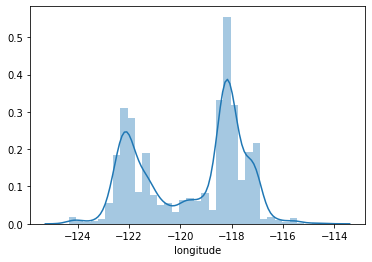

In [49]:
import seaborn as sns
sns.distplot(data_tr['longitude'])

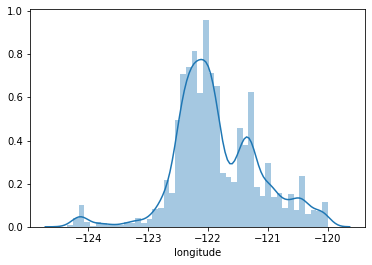

In [50]:
data_tr_long = data_tr[data_tr.longitude <= -120]
sns.distplot(data_tr_long['longitude'])

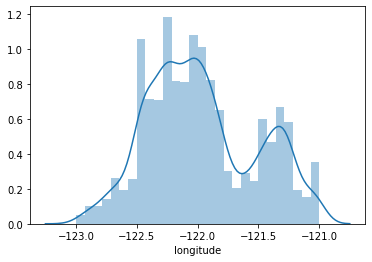

In [51]:
data_tr_long = data_tr[ (data_tr.longitude >= -123) & (data_tr.longitude <= -121) ]
sns.distplot(data_tr_long['longitude'])

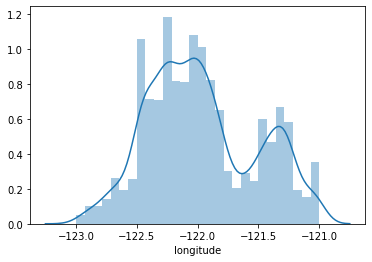

In [52]:
data_tr_long = data_tr.loc[ (data_tr.longitude >= -123) & (data_tr.longitude <= -121) ]
sns.distplot(data_tr_long['longitude'])

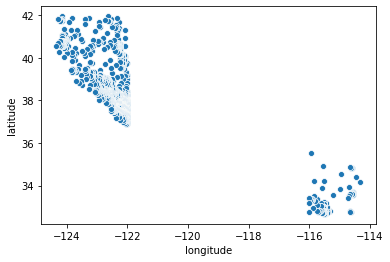

In [53]:
data_tr_long = data_tr[ (data_tr.longitude <= -122) | (data_tr.longitude >= -116) ]
sns.scatterplot(x="longitude", y="latitude", data=data_tr_long)

### 두개의 데이터 셋을 하나로 만들기
  * append 함수를 이용

In [56]:
base_dir = "/content/sample_data/"

data_tr = pd.read_csv(base_dir + "california_housing_train.csv")
data_test = pd.read_csv(base_dir + "california_housing_test.csv")

data_all = data_tr.append(data_test)
print(data_all.shape)
print(data_all.iloc[16995:17005])

(20000, 9)
       longitude  latitude  ...  median_income  median_house_value
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0
0        -122.05     37.37  ...         6.6085            344700.0
1        -118.30     34.26  ...         3.5990            176500.0
2        -117.81     33.78  ...         5.7934            270500.0
3        -118.36     33.82  ...         6.1359            330000.0
4        -119.67     36.33  ...         2.9375             81700.0

[10 rows x 9 columns]


### 데이터의 인덱스 번호를 초기화
  * [].reset_index() 함수를 사용

In [58]:
data_all = data_all.reset_index(drop=True)
print(data_all.iloc[16995:17005])

       longitude  latitude  ...  median_income  median_house_value
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0
17000    -122.05     37.37  ...         6.6085            344700.0
17001    -118.30     34.26  ...         3.5990            176500.0
17002    -117.81     33.78  ...         5.7934            270500.0
17003    -118.36     33.82  ...         6.1359            330000.0
17004    -119.67     36.33  ...         2.9375             81700.0

[10 rows x 9 columns]


In [59]:
data_all.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


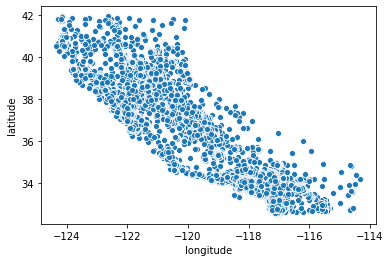

In [60]:
sns.scatterplot(x="longitude", y="latitude", data=data_all)

          longitude      latitude  ...  median_income  median_house_value
count  20000.000000  20000.000000  ...   20000.000000        20000.000000
mean    -119.566172     35.626750  ...       3.872132       207082.716750
std        2.003609      2.136141  ...       1.900356       115557.055856
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.562500       119800.000000
50%     -118.490000     34.250000  ...       3.536000       179800.000000
75%     -118.000000     37.710000  ...       4.745325       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


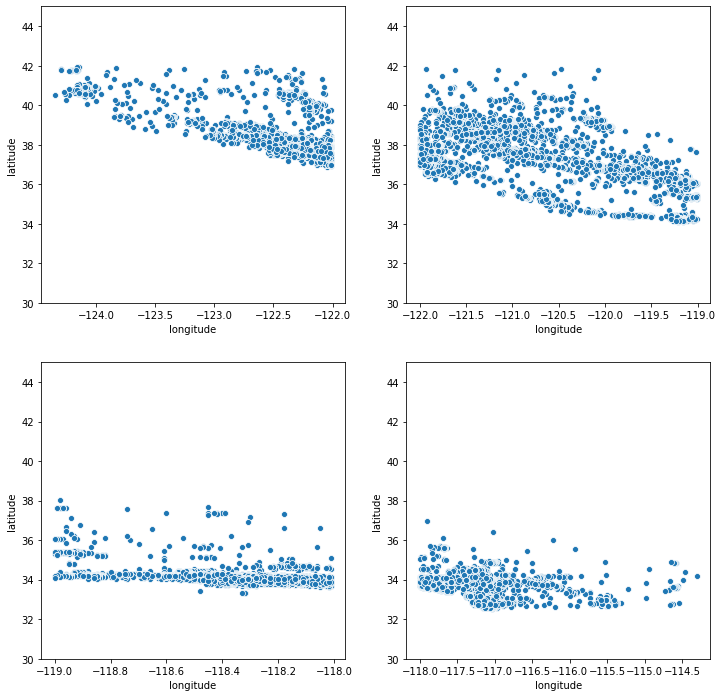

In [61]:
print(data_all.describe())
### -122미만, -122이상~-119미만, -119이상~-118미만, -118이상
data01 = data_all[data_all['longitude'] < -122]
data02 = data_all[ (data_all['longitude'] >= -122) &
                    (data_all['longitude'] < -119) ]
data03 = data_all[ (data_all['longitude'] >= -119) &
                    (data_all['longitude'] < -118) ]
data04 = data_all[data_all['longitude'] >= -118]

f, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0,0].set_ylim([30, 45])
axes[0,1].set_ylim([30, 45])
axes[1,0].set_ylim([30, 45])
axes[1,1].set_ylim([30, 45])

sns.scatterplot(x="longitude", y="latitude", data=data01, ax=axes[0, 0])
sns.scatterplot(x="longitude", y="latitude", data=data02, ax=axes[0, 1])
sns.scatterplot(x="longitude", y="latitude", data=data03, ax=axes[1, 0])
sns.scatterplot(x="longitude", y="latitude", data=data04, ax=axes[1, 1])

In [62]:
data01.to_csv('data_01.csv', index=False)
data02.to_csv('data_02.csv', index=False)
data03.to_csv('data_03.csv', index=False)
data04.to_csv('data_04.csv', index=False)

print(os.listdir())

['.config', 'data.xlsx', 'test7.html', 'data_04.csv', 'data.csv', 'data_01.csv', 'data_03.csv', 'data_02.csv', 'sample_data']


### 데이터를 그룹화하여 요약 값 확인
 * 네 개의 데이터를 읽어온다.
 * 각각의 데이터 셋에 새로운 변수(컬럼)을 생성.

In [63]:
data01 = pd.read_csv("data_01.csv")
data02 = pd.read_csv("data_02.csv")
data03 = pd.read_csv("data_03.csv")
data04 = pd.read_csv("data_04.csv")

print("각 데이터 행열 : {}".format(data01.shape) )
print("각 데이터 행열 : {}".format(data02.shape) )
print("각 데이터 행열 : {}".format(data03.shape) )
print("각 데이터 행열 : {}".format(data04.shape) )

각 데이터 행열 : (3831, 9)
각 데이터 행열 : (5486, 9)
각 데이터 행열 : (5681, 9)
각 데이터 행열 : (5002, 9)


In [0]:
# 새로운 컬럼 생성
data01['group_lat'] = 1
data02['group_lat'] = 2
data03['group_lat'] = 3
data04['group_lat'] = 4

### 한번에 여러개 파일 합치기

In [67]:
data_all = data01.append([data02, data03, data04], ignore_index = True)
data_all.group_lat.unique()  # 새 컬럼의 유일한 값 확인

array([1, 2, 3, 4])

### 새로운 컬럼을 활용하여 집 값의 중위값을 표시

전체 데이터 행열 :(20000, 10)
전체 데이터 컬럼명 :Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'group_lat'],
      dtype='object')
group_lat 컬럼의 값 : [1 2 3 4]


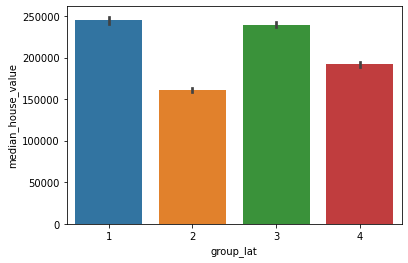

In [68]:
print("전체 데이터 행열 :{}".format(data_all.shape))
print("전체 데이터 컬럼명 :{}".format(data_all.columns))
print("group_lat 컬럼의 값 : {}".format(data_all.group_lat.unique()) )
sns.barplot(x="group_lat", y="median_house_value", data=data_all)

### 값들의 데이터 개수 알아보기

In [69]:
print(data_all['group_lat'].value_counts() )

3    5681
2    5486
4    5002
1    3831
Name: group_lat, dtype: int64


In [70]:
print(pd.value_counts(data_all['group_lat']) )

3    5681
2    5486
4    5002
1    3831
Name: group_lat, dtype: int64


### 데이터를 그룹화하여 이에 대한 요약값을 확인하기

In [71]:
### 지역별 집 값 알아보기
grouped = data_all.groupby('group_lat')  # 그룹화
print( "행정구역 인구 평균 :\n ", grouped.mean()['population'] )    # 행정 구역 인구 데이터의 평균
print( "소득 평균 :\n ",grouped.mean()['median_income'] ) # 소득 데이터의 평균
print( "방 개수 평균 :\n ",grouped.mean()['total_rooms'] )   # 방 개수 데이터의 평균
print( "세대 수 평균 :\n ",grouped.mean()['households'] )    # 세대 수 데이터의 평균

행정구역 인구 평균 :
  group_lat
1    1199.107022
2    1371.886438
3    1471.122162
4    1606.109556
Name: population, dtype: float64
소득 평균 :
  group_lat
1    4.112725
2    3.529840
3    3.904002
4    4.027080
Name: median_income, dtype: float64
방 개수 평균 :
  group_lat
1    2457.613678
2    2609.436930
3    2410.067594
4    3062.564574
Name: total_rooms, dtype: float64
세대 수 평균 :
  group_lat
1    466.478204
2    474.076376
3    505.227953
4    546.271092
Name: households, dtype: float64


### 그룹화한 결과를 시각화하여 확인하기

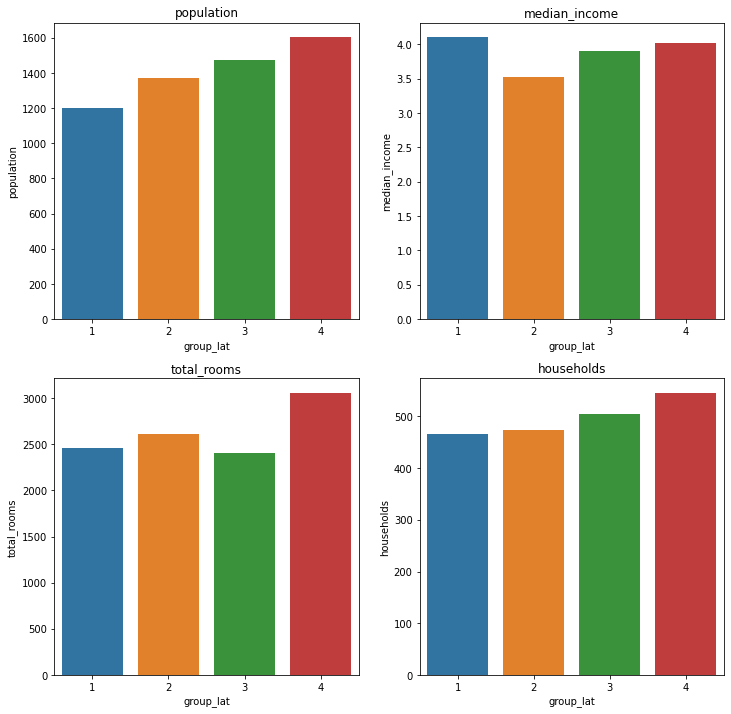

In [72]:
# 2행 2열의 그래프 만들고 전체 크기 지정 
fig ,axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열의 구조 
fig.set_size_inches(12,12)  # 전체 크기

# 그룹화하기
grouped = data_all.groupby('group_lat').mean()

# 막대 그래프로 확인해 보기 
sns.barplot(x=grouped.index, y="population", data=grouped, ax= axes[0][0])
sns.barplot(x=grouped.index, y="median_income", data=grouped, ax= axes[0][1])
sns.barplot(x=grouped.index, y="total_rooms", data=grouped, ax= axes[1][0])
sns.barplot(x=grouped.index, y="households", data=grouped, ax= axes[1][1])

# 각각의 그래프에 제목을 넣기
axes[0][0].title.set_text('population')
axes[0][1].title.set_text('median_income')
axes[1][0].title.set_text('total_rooms')
axes[1][1].title.set_text('households')


group_lat
1    244581.258418
2    161318.769595
3    239442.813237
4    191802.107557
Name: median_house_value, dtype: float64
group_lat
1    9.369908e+08
2    8.849948e+08
3    1.360275e+09
4    9.593941e+08
Name: median_house_value, dtype: float64
group_lat
1    128465.584053
2     96476.318617
3    117564.610356
4    100284.984009
Name: median_house_value, dtype: float64


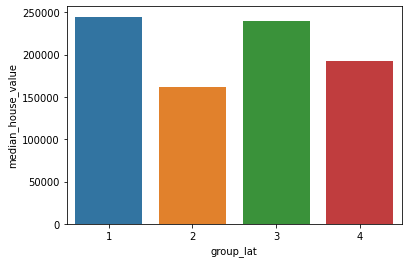

In [73]:
### 지역별 집 값 알아보기
grouped = data_all.groupby('group_lat')  # 그룹화
print( grouped.mean()['median_house_value'] )  # 지역별 집 값 평균
print( grouped.sum()['median_house_value'] )  # 지역별 집값의 전체 합 
print( grouped.std()['median_house_value'] )  # 지역별 집값의 표준편차

grouped = grouped.mean()
sns.barplot(x=grouped.index, y="median_house_value", data=grouped)